# EI balance in different CA1 neurons.

In [32]:
import sys
sys.path.append("../")
import glob
from Linearity import Neuron
import numpy as np
import scipy.stats as ss
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import findfont, FontProperties
plt.style.use('neuron')
from pickle import dump

In [33]:
def simpleaxis(axes, every=False, outward=False):
    if not isinstance(axes, (list, np.ndarray)):
        axes = [axes]
    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        if (outward):
            ax.spines['bottom'].set_position(('outward', 10))
            ax.spines['left'].set_position(('outward', 10))
        if every:
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_title('')

In [34]:
#Colorscheme for squares
color_sqr = { index+1: color for index, color in enumerate(matplotlib.cm.viridis(np.linspace(0,1,9)))}

In [35]:
voltageClampFiles = '/media/sahil/NCBS_Shares_BGStim/patch_data/voltage_clamp_files.txt'

In [39]:
with open (voltageClampFiles,'r') as r:
    dirnames = r.read().splitlines()

In [40]:
#Colorscheme for cells
color_cell = matplotlib.cm.plasma(np.linspace(0,1,len(dirnames)))

In [41]:
dirnames

['/media/sahil/NCBS_Shares_BGStim/patch_data/161220/c2_EI/',
 '/media/sahil/NCBS_Shares_BGStim/patch_data/170510/c2_EI/',
 '/media/sahil/NCBS_Shares_BGStim/patch_data/170524/c3_EI/',
 '/media/sahil/NCBS_Shares_BGStim/patch_data/170524/c1_EI/',
 '/media/sahil/NCBS_Shares_BGStim/patch_data/170530/c2_EI/',
 '/media/sahil/NCBS_Shares_BGStim/patch_data/170530/c1_EI/',
 '/media/sahil/NCBS_Shares_BGStim/patch_data/170531/c2_EI/',
 '/media/sahil/NCBS_Shares_BGStim/patch_data/170531/c4_EI/',
 '/media/sahil/NCBS_Shares_BGStim/patch_data/170531/c1_EI/',
 '/media/sahil/NCBS_Shares_BGStim/patch_data/170720/c5_EI/',
 '/media/sahil/NCBS_Shares_BGStim/patch_data/170720/c3_EI/',
 '/media/sahil/NCBS_Shares_BGStim/patch_data/170720/c4_EI/',
 '/media/sahil/NCBS_Shares_BGStim/patch_data/170720/c2_EI/']

In [43]:
neurons = []
for dirname in dirnames:
    cellIndex = dirname.split('/')[-2]
    filename = dirname + 'plots/' + cellIndex + '.pkl'
    neurons.append(Neuron.load(filename))

In [52]:
feature = 1
scalingFactor = 1e9
r_squared = []
slopes = []
for index, n in enumerate(neurons):
    n = neurons[index]
    obs_exc, obs_inh = {}, {}
    exc_error, inh_error = {}, {}
    sqrs = []
    fig, ax = plt.subplots()
    # fig.suptitle("Representative cell {}, {}".format(n.index,n.date), fontsize=18)
    for expType,expt in n:
        for sqr in expt:
            if (expType == 1):
                sqrs.append(sqr)
                for coord in expt[sqr].coordwise:
                    obs_exc[coord] = expt[sqr].coordwise[coord].average_feature[1]
                    exc_error[coord] = np.std([trial.feature[1] for trial in expt[sqr].coordwise[coord].trials], ddof = 1)
            elif (expType == 2):
                for coord in expt[sqr].coordwise:
                    obs_inh[coord] = expt[sqr].coordwise[coord].average_feature[1]
                    inh_error[coord] = np.std([trial.feature[1] for trial in expt[sqr].coordwise[coord].trials], ddof = 1)

    exc, inh = [], []
    for coord in set(obs_exc).intersection(set(obs_inh)):
        exc.append(-obs_exc[coord]*scalingFactor)
        inh.append(obs_inh[coord]*scalingFactor)
        #ax.errorbar(-obs_exc[coord]*scalingFactor, obs_inh[coord]*scalingFactor, xerr=exc_error[coord]*scalingFactor, yerr=inh_error[coord]*scalingFactor,markersize=3, c='k', fmt='.', alpha=1, markerfacecolor='k', ecolor='gray')
        ax.scatter(-obs_exc[coord]*scalingFactor, obs_inh[coord]*scalingFactor, color='k', s=15)

    slope, intercept, rval, pval, stderr = ss.linregress(exc, inh)

    excRange = np.linspace(0, 1.1*max(exc), 100)
    inhFit = excRange*slope + intercept

    ax.plot(excRange, inhFit, '--', c='gray', label="slope {:.2f}, $r^2$ {:.2f}".format(slope, rval**2))

    xlim_old = ax.get_xlim()
    ylim_old = ax.get_ylim()
    minlim, maxlim = min(xlim_old[0], ylim_old[0]), max(xlim_old[1], ylim_old[1])
    ax.plot((0,maxlim), (0,maxlim),'--')
    ax.set_xlim(0,maxlim)
    ax.set_ylim(0,maxlim)
    ax.set_xlabel("Excitation (pA)")
    ax.set_ylabel("Inhibition (pA)")
    fig.set_figheight(3)
    fig.set_figwidth(3)
    simpleaxis(ax)
    plt.legend(loc='lower right')
    plt.savefig("/media/sahil/NCBS_Shares_BGStim/EI_figures_Aug9/{}_{}.png".format(n.date,n.index))
    plt.close()

## Figure 2 C (Example Cell)

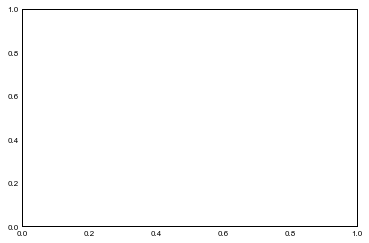

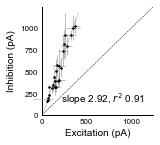

In [23]:
index = 5
n = neurons[index]
obs_exc, obs_inh = {}, {}
exc_error, inh_error = {}, {}
sqrs = []
fig, ax = plt.subplots()
# fig.suptitle("Representative cell {}, {}".format(n.index,n.date), fontsize=18)
for expType,expt in n:
    for sqr in expt:
        if (expType == 1):
            sqrs.append(sqr)
            for coord in expt[sqr].coordwise:
                obs_exc[coord] = expt[sqr].coordwise[coord].average_feature[5]
                exc_error[coord] = np.std([trial.feature[5] for trial in expt[sqr].coordwise[coord].trials], ddof = 1)
        elif (expType == 2):
            for coord in expt[sqr].coordwise:
                obs_inh[coord] = expt[sqr].coordwise[coord].average_feature[0]
                inh_error[coord] = np.std([trial.feature[0] for trial in expt[sqr].coordwise[coord].trials], ddof = 1)

exc, inh = [], []
for coord in set(obs_exc).intersection(set(obs_inh)):
    exc.append(-obs_exc[coord]*scalingFactor)
    inh.append(obs_inh[coord]*scalingFactor)
    ax.errorbar(-obs_exc[coord]*scalingFactor, obs_inh[coord]*scalingFactor, xerr=exc_error[coord]*scalingFactor, yerr=inh_error[coord]*scalingFactor,markersize=3, c='k', fmt='.', alpha=1, markerfacecolor='k', ecolor='gray')

slope, intercept, rval, pval, stderr = ss.linregress(exc, inh)

excRange = np.linspace(0, 1.1*max(exc), 100)
inhFit = excRange*slope + intercept

ax.plot(excRange, inhFit, '--', c='gray', label="slope {:.2f}, $r^2$ {:.2f}".format(slope, rval**2))

xlim_old = ax.get_xlim()
ylim_old = ax.get_ylim()
minlim, maxlim = min(xlim_old[0], ylim_old[0]), max(xlim_old[1], ylim_old[1])
ax.plot((0,maxlim), (0,maxlim),'--')
ax.set_xlim(0,maxlim)
ax.set_ylim(0,maxlim)
ax.set_xlabel("Excitation (pA)")
ax.set_ylabel("Inhibition (pA)")
fig.set_figheight(2)
fig.set_figwidth(2)
simpleaxis(ax)
plt.legend(loc='lower right')
dump(fig,file('figures/fig2/2c.pkl','wb'))
plt.show()

## Figures 2 D, E (Statistics)

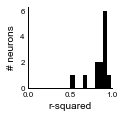

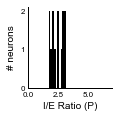

In [24]:
fig, ax = plt.subplots()

ax.hist(r_squared)
# ax[0].set_title("$r^2$ for linear regression")
ax.set_xlabel("r-squared")
ax.set_ylabel("# neurons")
ax.set_xlim((0,1))
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
simpleaxis(ax)
dump(fig,file('figures/fig2/2d.pkl','wb'))
plt.show()

fig, ax = plt.subplots()
ax.hist(slopes)
ax.set_xlabel("I/E Ratio (P)")
ax.set_ylabel("# neurons")
ax.set_xlim(0,7)
ax.set_yticks([0,1,2])
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
simpleaxis(ax)
dump(fig,file('figures/fig2/2e.pkl','wb'))
plt.show()

In [25]:
np.mean(r_squared), np.std(r_squared)

(0.8504479682028987, 0.12135239382075912)

In [26]:
r_squared

[0.91791630294982463,
 0.87007086610480988,
 0.81906989558922516,
 0.50535721040200698,
 0.92751880711176082,
 0.91463423933805421,
 0.82505592723291754,
 0.6893223075494459,
 0.90731087558769552,
 0.9276448466976438,
 0.90027115078385911,
 0.98383120097695675,
 0.86781995631348186]

In [29]:
n.features

{0: 'epsp_max',
 1: 'epsp_area',
 2: 'epsp_avg',
 3: 'epsp_time_to_peak',
 4: 'epsp_area_to_peak',
 5: 'epsp_min',
 6: 'epsp_onset'}

## Figure 2 F: r-square and I/E changes with number of squares

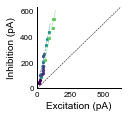

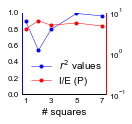

In [28]:
r_squared = []
slopes = []
index = 5
n = neurons[index]
obs_exc, obs_inh = {}, {}
sqrs = {}

fig, ax = plt.subplots()
# f.suptitle("Representative cell {}, {}".format(n.index,n.date), fontsize=18)

r_sqrs, slopes, sqrs = [], [], []

for sqr in set(n.experiment[1]).intersection(set(n.experiment[2])):
    exc, inh = [], []
    exc_error, inh_error = [], []
    for coord in set(n.experiment[1][sqr].coordwise).intersection(set(n.experiment[1][sqr].coordwise)):
        exc.append(-n.experiment[1][sqr].coordwise[coord].average_feature[1]*scalingFactor)
        inh.append(n.experiment[2][sqr].coordwise[coord].average_feature[1]*scalingFactor)
        exc_error.append(np.std([trial.feature[1] for trial in n.experiment[1][sqr].coordwise[coord].trials], ddof = 1)*scalingFactor)
        inh_error.append(np.std([trial.feature[1] for trial in n.experiment[2][sqr].coordwise[coord].trials], ddof = 1)*scalingFactor)
    ax.scatter(exc, inh, c=color_sqr[sqr], s=5, label=sqr)
    #ax[0].errorbar(exc, inh, xerr=exc_error, yerr=inh_error, c='k', fmt='.', alpha=0.1)

    slope, intercept, rval, pval, stderr = ss.linregress(exc, inh)

    excRange = np.linspace(0.9*min(exc), 1.1*max(exc), 100)
    inhFit = excRange*slope + intercept

    ax.plot(excRange, inhFit, '--', c=color_sqr[sqr])
    sqrs.append(sqr)
    slopes.append(slope)
    r_sqrs.append(rval**2)

xlim_old = ax.get_xlim()
ylim_old = ax.get_ylim()
minlim, maxlim = min(xlim_old[0], ylim_old[0]), max(xlim_old[1], ylim_old[1])
ax.plot((0,maxlim), (0,maxlim),'--', label="P=1")
ax.set_xlim(0,maxlim)
ax.set_ylim(0,maxlim)
ax.set_title("Linear regression showing proportional E and I")
ax.set_xlabel("Excitation (pA)")
ax.set_ylabel("Inhibition (pA)")
#ax.legend(loc='lower right')
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
simpleaxis(ax)
dump(fig,file('figures/fig2/2f1.pkl','wb'))
plt.show()

fig, ax = plt.subplots()
line1 = ax.plot(sqrs, r_sqrs, '.-', markersize=6, label="$r^2$ values",c='b')
ax.set_ylim((0,1))
ax.xaxis.set_ticks([1,3,5,7,9])
ax_copy = ax.twinx()
line2 = ax_copy.plot(sqrs, slopes, '.-', markersize=6, label="I/E (P)",c='r')
ax.set_title("Different number of squares show consistent EI ratios")
ax.set_xlabel("# squares")
#ax.set_ylabel("$r^2$ values")
ax_copy.set_ylim((0.1,10))
#ax_copy.set_ylabel("E/I Ratio (P)")
ax_copy.set_yscale("log")

ax.spines['left'].set_color('b')
ax_copy.spines['right'].set_color('r')
lines = line1+line2
labs = [l.get_label() for l in lines]
ax.legend(lines, labs, loc=0)
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
simpleaxis(ax)
simpleaxis(ax_copy,every=True)
ax_copy.spines['right'].set_visible(True)
ax_copy.get_yaxis().tick_right()

dump(fig,file('figures/fig2/2f2.pkl','wb'))
plt.show()

    A. shows tight balance between tight balance between excitation and inhibition at the CA1 neuron. 
    B. shows r-square for linear regression showing high degree of correlation between E and I. 
    C. showing different proportionality P of all CA1 neurons.